# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | douentza
Processing Record 3 of Set 1 | yerofey pavlovich
Processing Record 4 of Set 1 | kihei
Processing Record 5 of Set 1 | gizo
Processing Record 6 of Set 1 | ovalle
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | paramonga
Processing Record 13 of Set 1 | kourou
Processing Record 14 of Set 1 | lucapa
Processing Record 15 of Set 1 | muhlhausen
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kudymkar
Processing Record 19 of Set 1 | shangri-la
City not found. Skipping...
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | lazaro ca

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.78,78,99,10.64,PN,1730321692
1,douentza,14.9951,-2.9517,29.06,17,83,1.38,ML,1730321693
2,yerofey pavlovich,53.9667,121.9667,-4.05,96,100,1.14,RU,1730321694
3,kihei,20.7850,-156.4656,27.81,79,40,9.77,US,1730321695
4,gizo,-8.1030,156.8419,27.79,76,57,0.83,SB,1730321696


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.78,78,99,10.64,PN,1730321692
1,douentza,14.9951,-2.9517,29.06,17,83,1.38,ML,1730321693
2,yerofey pavlovich,53.9667,121.9667,-4.05,96,100,1.14,RU,1730321694
3,kihei,20.7850,-156.4656,27.81,79,40,9.77,US,1730321695
4,gizo,-8.1030,156.8419,27.79,76,57,0.83,SB,1730321696


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

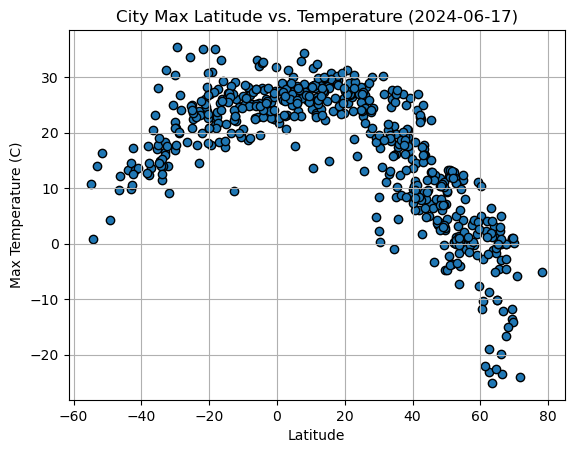

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

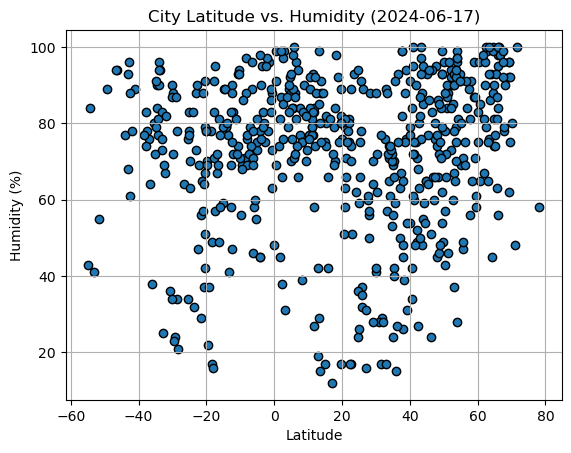

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

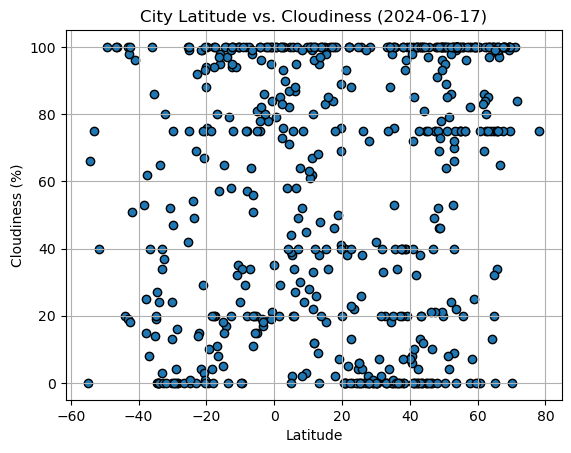

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

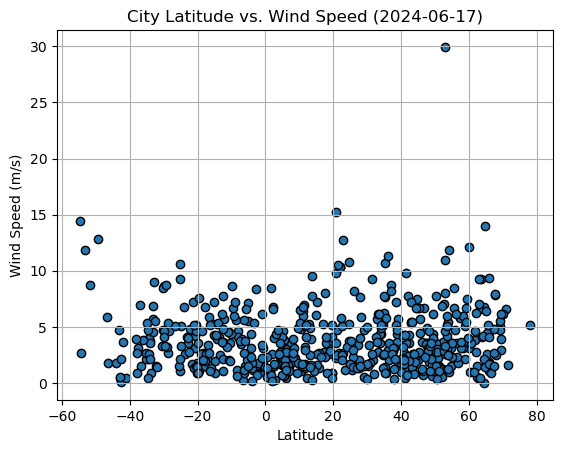

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regression_line = slope * x_values + intercept
    
    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color='red')
    
    # Add titles and labels
    plt.title(f"{title}\nR-squared = {rvalue**2:.2f}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the plot
    plt.savefig(save_path)
    
    # Show the plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,douentza,14.9951,-2.9517,29.06,17,83,1.38,ML,1730321693
2,yerofey pavlovich,53.9667,121.9667,-4.05,96,100,1.14,RU,1730321694
3,kihei,20.7850,-156.4656,27.81,79,40,9.77,US,1730321695
6,lihue,21.9789,-159.3672,26.77,75,100,10.29,US,1730321470
8,olonkinbyen,70.9221,-8.7187,-5.85,48,100,6.58,SJ,1730321700


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.78,78,99,10.64,PN,1730321692
4,gizo,-8.1030,156.8419,27.79,76,57,0.83,SB,1730321696
5,ovalle,-30.5983,-71.2003,24.96,36,52,3.27,CL,1730321422
7,port-aux-francais,-49.3500,70.2167,4.23,89,100,12.85,TF,1730321699
9,grytviken,-54.2811,-36.5092,0.90,84,66,2.65,GS,1730321701


###  Temperature vs. Latitude Linear Regression Plot

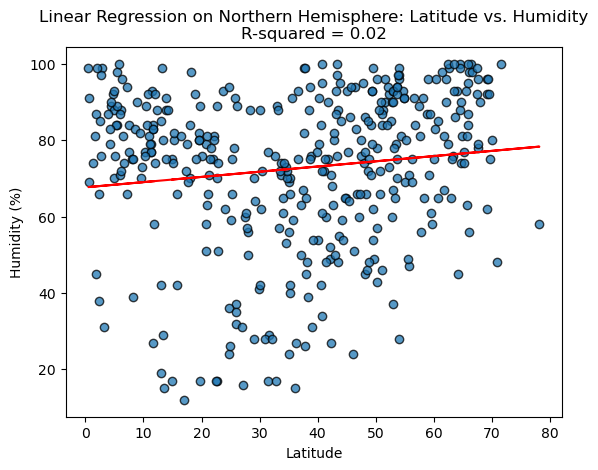

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude",  # x_label
    "Humidity (%)",  # y_label
    "Linear Regression on Northern Hemisphere: Latitude vs. Humidity",  # title
    "output_data/northern_lat_vs_humidity.png"  # save_path
)

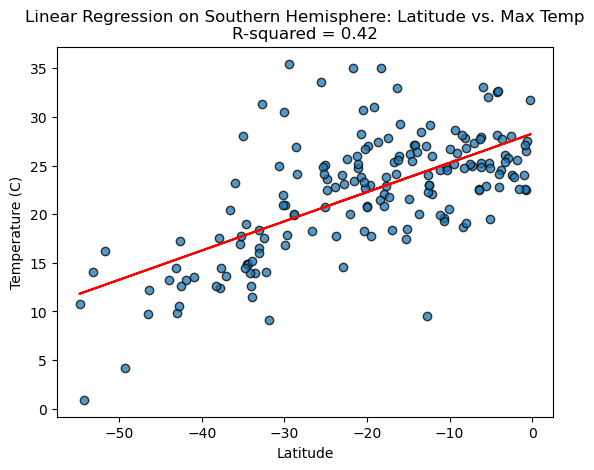

In [22]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],          # x_values: Latitude
    southern_hemi_df['Max Temp'],     # y_values: Max Temperature
    "Latitude",                       # x_label
    "Temperature (C)",                # y_label
    "Linear Regression on Southern Hemisphere: Latitude vs. Max Temp",  # title
    "output_data/southern_lat_vs_temp.png"  # save_path
)

**Discussion about the linear relationship:**  while latitude significantly influences maximum temperature in the Southern Hemisphere, it has minimal impact on humidity levels in the Northern Hemisphere, as shown by the stark difference in R-squared values.

### Humidity vs. Latitude Linear Regression Plot

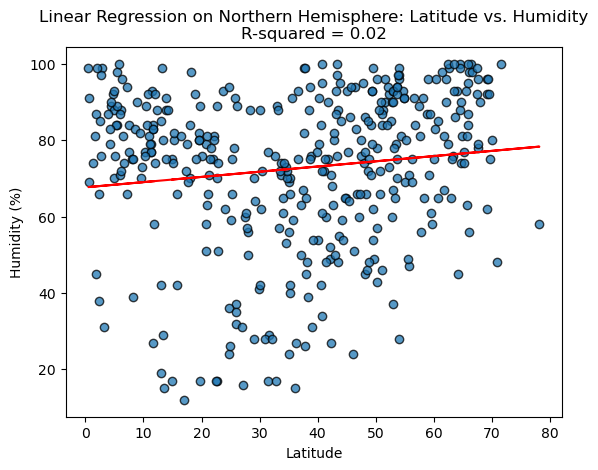

In [24]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression Plot
plot_linear_regression(
    northern_hemi_df['Lat'],           # x_values: Latitude
    northern_hemi_df['Humidity'],      # y_values: Humidity
    "Latitude",                        # x_label
    "Humidity (%)",                    # y_label
    "Linear Regression on Northern Hemisphere: Latitude vs. Humidity",  # title
    "output_data/northern_lat_vs_humidity.png"  # save_path
)

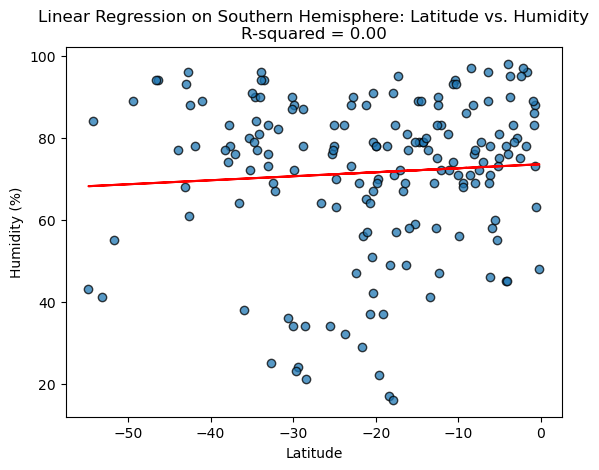

In [26]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot
plot_linear_regression(
    southern_hemi_df['Lat'],            # x_values: Latitude
    southern_hemi_df['Humidity'],       # y_values: Humidity
    "Latitude",                         # x_label
    "Humidity (%)",                     # y_label
    "Linear Regression on Southern Hemisphere: Latitude vs. Humidity",  # title
    "output_data/southern_lat_vs_humidity.png"  # save_path
)

**Discussion about the linear relationship:** both plots confirm that latitude has minimal to no impact on humidity levels in either hemisphere, as evidenced by the near-zero R-squared values. This indicates that factors other than latitude are more likely to influence humidity across these regions.

### Cloudiness vs. Latitude Linear Regression Plot

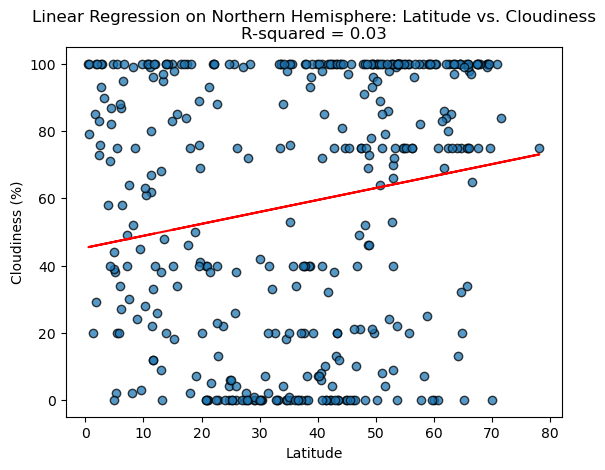

In [31]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot
plot_linear_regression(
    northern_hemi_df['Lat'],               # x_values: Latitude
    northern_hemi_df['Cloudiness'],        # y_values: Cloudiness
    "Latitude",                            # x_label
    "Cloudiness (%)",                      # y_label
    "Linear Regression on Northern Hemisphere: Latitude vs. Cloudiness",  # title
    "output_data/northern_lat_vs_cloudiness.png"  # save_path
)

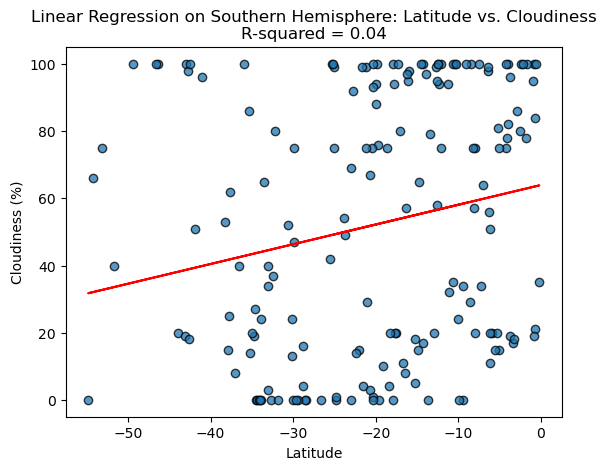

In [32]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot
plot_linear_regression(
    southern_hemi_df['Lat'],               # x_values: Latitude
    southern_hemi_df['Cloudiness'],        # y_values: Cloudiness
    "Latitude",                            # x_label
    "Cloudiness (%)",                      # y_label
    "Linear Regression on Southern Hemisphere: Latitude vs. Cloudiness",  # title
    "output_data/southern_lat_vs_cloudiness.png"  # save_path
)

**Discussion about the linear relationship:**  both plots confirm that latitude has little to no impact on cloudiness in either hemisphere, as shown by the low R-squared values. This suggests that factors other than latitude likely have a more substantial influence on cloudiness across these regions.

### Wind Speed vs. Latitude Linear Regression Plot

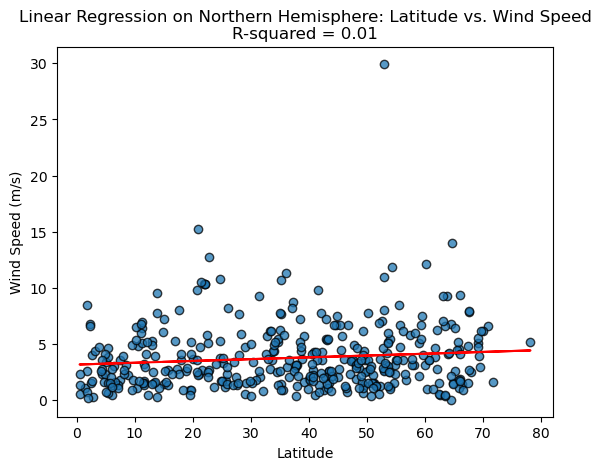

In [33]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot
plot_linear_regression(
    northern_hemi_df['Lat'],                # x_values: Latitude
    northern_hemi_df['Wind Speed'],         # y_values: Wind Speed
    "Latitude",                             # x_label
    "Wind Speed (m/s)",                     # y_label
    "Linear Regression on Northern Hemisphere: Latitude vs. Wind Speed",  # title
    "output_data/northern_lat_vs_wind_speed.png"  # save_path
)

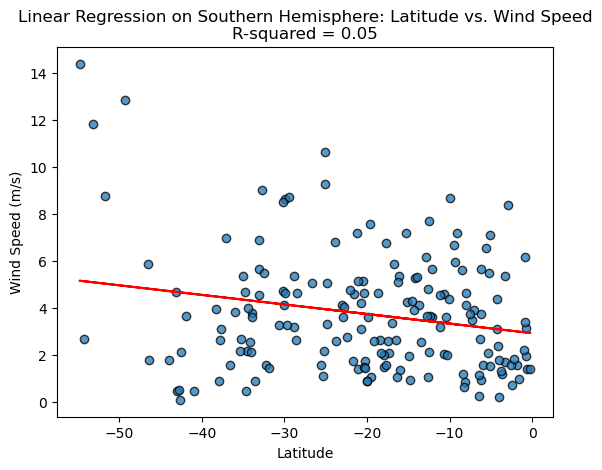

In [34]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot
plot_linear_regression(
    southern_hemi_df['Lat'],                # x_values: Latitude
    southern_hemi_df['Wind Speed'],         # y_values: Wind Speed
    "Latitude",                             # x_label
    "Wind Speed (m/s)",                     # y_label
    "Linear Regression on Southern Hemisphere: Latitude vs. Wind Speed",  # title
    "output_data/southern_lat_vs_wind_speed.png"  # save_path
)

**Discussion about the linear relationship:** the low R-squared values for both hemispheres indicate that latitude has little to no impact on wind speed, highlighting that wind speed is likely influenced more by other variables beyond geographic latitude.